## Image pre-processing for traffic sign detection

### Importing libraries

In [59]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import transform
from skimage import io
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import gc

### Saving data onto a numpy array

In [2]:
# im_ar = []
# for count, i in enumerate(sorted(os.listdir("data/Train"))):
#     print("Loading data: folder {}".format(count))
#     if i != "desktop.ini":
#         for j in sorted(os.listdir("data/Train/" + str(count))):
#             if j[-3:] == "png":
#                 image = io.imread("data/Train/" + str(count) + "/" + j)
#                 im = transform.resize(image, (32, 32))
#                 im_ar.append(im) 
# # array = np.asarray(im_ar)
# # np.save('data.npy', array) # save

Testing data

In [47]:
# im_ar = []
# for count, i in enumerate(sorted(os.listdir("data/Test"))):
#     if i[-3:] == "png":
#         image = io.imread("data/Test/" + i)
#         im = transform.resize(image, (32, 32))
#         im_ar.append(im) 
# array = np.asarray(im_ar)
# np.save('testing.npy', array) # save

### Loading data from numpy array

In [57]:
X_train = np.load('data.npy') # load
X_test = np.load('testing.npy') # load

In [49]:
print(X_train.shape, test_array.shape)

(39209, 32, 32, 3) (12630, 32, 32, 3)


### Importing data labels

In [60]:
labels = []
for count, i in enumerate(sorted(os.listdir("data/Train"))):
    #print("Loading data: folder {}".format(count))
    if i != "desktop.ini":
        for j in sorted(os.listdir("data/Train/" + str(count))):
            if j[-3:] == "png":
                labels = labels + [count] 



In [61]:
y_train = np.asarray(labels)

Testing

In [62]:
y_test = pd.read_csv("Data/Test.csv").ClassId.values

### Inspecting data

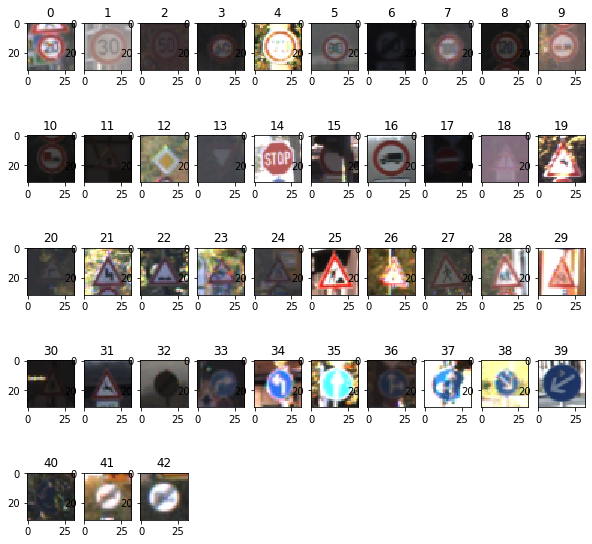

In [66]:
plt.figure(figsize = (10, 10))
for i in set(y_train):
    index = np.where(y_train == i)[0][0]
    #print(i)
    ax = plt.subplot(5, 10, i+1)
    ax.set_title(str(y_train[index]))
    ax.imshow(X_train[index])


In [67]:
len(set(y_train))

43

In [73]:
y_train.shape

(39209,)

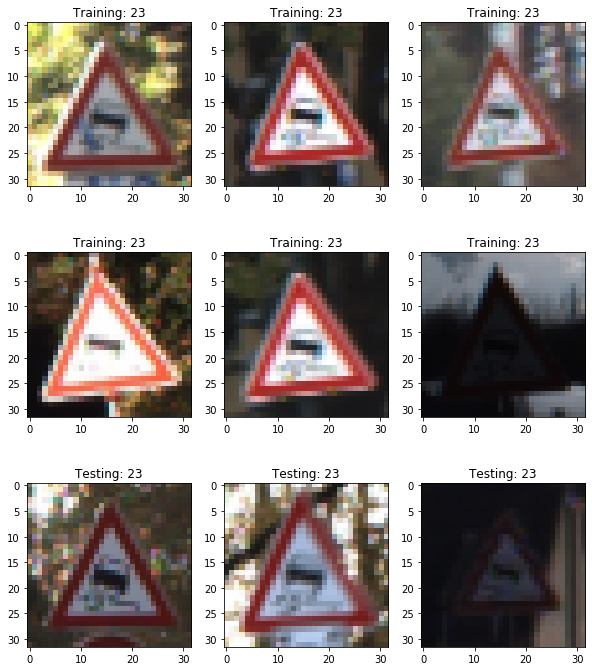

In [103]:
def show_im(choice  =  23):
    """
    Take choice of category. Return 6 random training images of that category and 3 testing.
    """
    plt.figure(figsize = (10, 12))
    for i in range(6):

        type_im = sorted(np.where(y_train == choice)[0])
        #print(len(type_im))
        index = np.random.choice(type_im)

        #print(y_train[index])

        ax = plt.subplot(3, 3, i+1)
        ax.set_title("Training: " + str(y_train[index]))
        ax.imshow(X_train[index])

    for i in range(3):
        type_im = sorted(np.where(y_test == choice)[0])
        chosen_im = np.random.choice(type_im)
        ax = plt.subplot(3, 3, i+7)
        ax.set_title("Testing: " + str(y_test[chosen_im]))
        ax.imshow(X_test[chosen_im])

        #chosen_im = int(np.random.rand()*len(type_im))
        
show_im()

## Tensorflow implementation

https://www.tensorflow.org/tutorials/images/cnn

In [113]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [114]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

In [115]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43))

In [116]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [117]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 39209 samples, validate on 12630 samples
Epoch 1/10
39209/39209 [==============================] - 20s 512us/sample - loss: 1.4300 - accuracy: 0.6016 - val_loss: 0.7974 - val_accuracy: 0.7961
Epoch 2/10
39209/39209 [==============================] - 19s 492us/sample - loss: 0.3648 - accuracy: 0.9007 - val_loss: 0.6142 - val_accuracy: 0.8602
Epoch 3/10
39209/39209 [==============================] - 20s 511us/sample - loss: 0.2171 - accuracy: 0.9441 - val_loss: 0.6911 - val_accuracy: 0.8696
Epoch 4/10
39209/39209 [==============================] - 22s 551us/sample - loss: 0.1557 - accuracy: 0.9594 - val_loss: 0.6140 - val_accuracy: 0.8729
Epoch 5/10
39209/39209 [==============================] - 21s 527us/sample - loss: 0.1193 - accuracy: 0.9689 - val_loss: 0.5616 - val_accuracy: 0.8964
Epoch 6/10
39209/39209 [==============================] - 20s 500us/sample - loss: 0.0983 - accuracy: 0.9739 - val_loss: 0.4986 - val_accuracy: 0.9000
Epoch 7/10
39209/39209 [====================

12630/12630 - 2s - loss: 0.5806 - accuracy: 0.9005


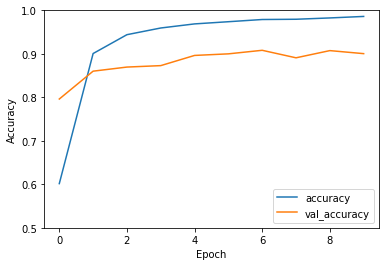

In [118]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)